In [15]:
from matplotlib import pyplot as plt
from tqdm import tqdm
import subprocess
from subprocess import Popen, PIPE, STDOUT

p = subprocess.Popen(f'make', shell=True, stdout=PIPE, stderr=STDOUT)
p.wait()

0

  0%|          | 0/4 [00:00<?, ?it/s]

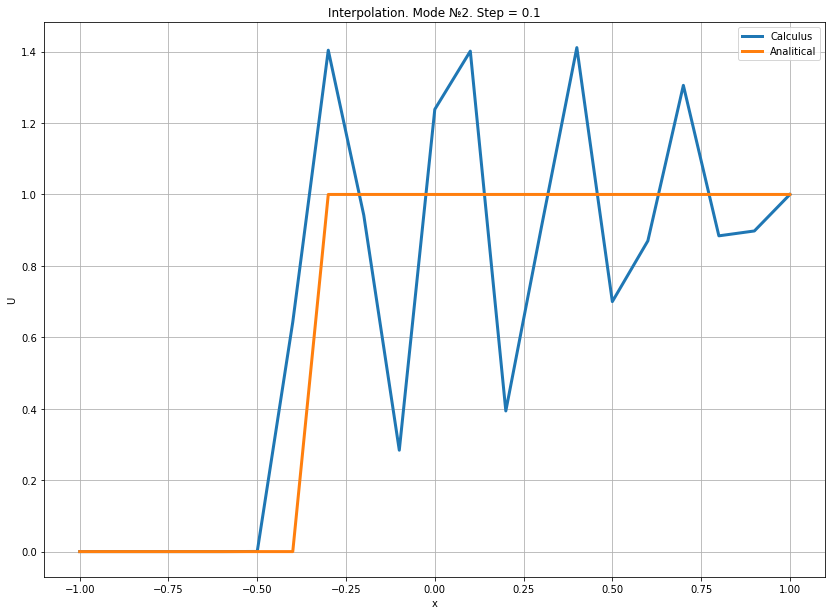

 25%|██▌       | 1/4 [00:00<00:02,  1.20it/s]

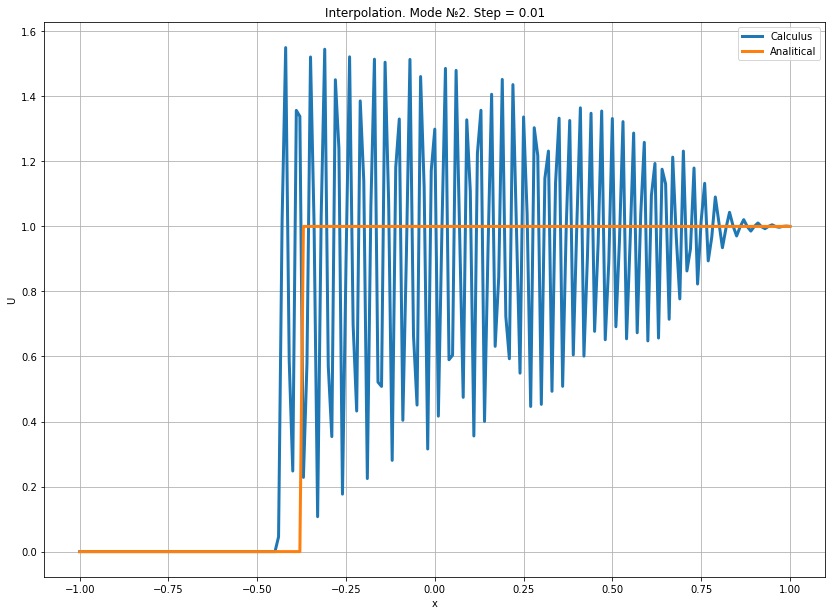

 50%|█████     | 2/4 [00:01<00:01,  1.33it/s]

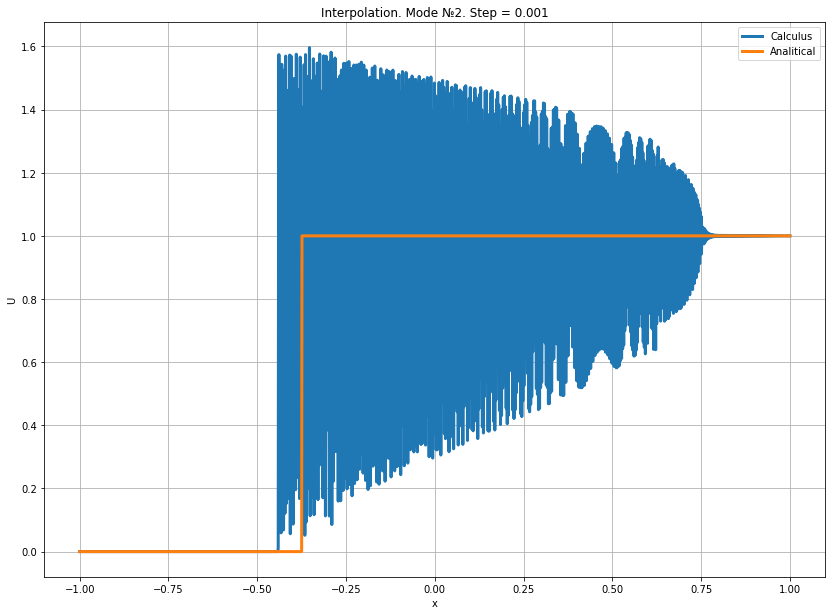

 75%|███████▌  | 3/4 [00:02<00:00,  1.21it/s]

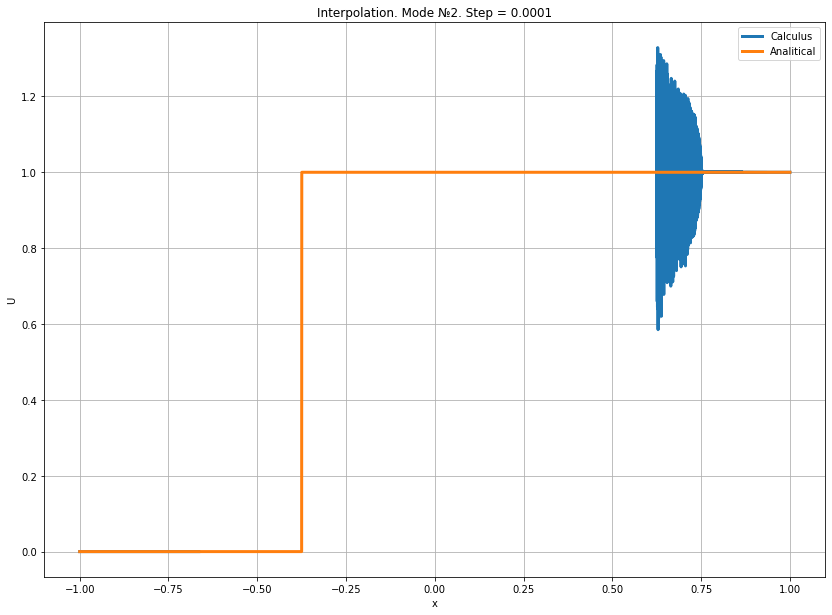

100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


In [36]:

mode_list = [0, 1]
T_list = [0.1, 0.01, 0.001, 0.0001]
for mode in mode_list:
    for T in tqdm(T_list):
        p = subprocess.Popen(f'./main 0 {mode} {T} {T}', shell=True, stdout=PIPE, stderr=STDOUT)
        p.wait()
        plt.figure(figsize=(14, 10), dpi=72)
        ###plt.axis([-1, 1, 0, 1])
        with open(f'./trajectory.txt') as f:
                x = []
                y = []
                U = []
                cf = f.read().replace(" ", "").splitlines()
                for i in range(0, len(cf)):
                    cf[i] = cf[i].split('|')
                    x.append(float(cf[i][0]))
                    y.append(float(cf[i][1]))
                    U.append(float(cf[i][2]))
                plt.plot(x,y, linewidth=3., label=f'Calculus')
                plt.plot(x,U, linewidth=3., label=f'Analitical')   
        plt.xlabel('x')
        plt.ylabel('U') 
        plt.title(f'Interpolation. Mode №{str(mode+1)}. Step = {str(T)}')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'./plots/plot_{str(mode + 1)}_{str(T)}.png', transparent=False)
        plt.show()

In [14]:
p = subprocess.Popen(f'make clean', shell=True, stdout=PIPE, stderr=STDOUT)
p.wait()

0